# Esercitazione 1

Nella cartella sono presenti:
- I vari header file.
- I vari `*.cpp` file con dentro i vari main.
- Gli input file.
- Un makefile.
- I flie per la generazione di numeri casuali: seed.in, Primes.
- I vari file di output.

Prima di compilare, eseguire i seguenti comandi da terminale:
```bash
cd ..           #Vado nella cartella iniziale dove ci deve essere il file setup.sh
source setup.sh
```

Queste linee di codice servono per imortare le librerie necessarie per far funzionare i codici nel notebook.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
from scipy.stats import cauchy
from scipy.stats import norm

## 1 Test del Generatore di Numeri Casuali

La generazione di numeri casuali è molto utile per lo studio stocastico di problemi numerici di ogni tipo.  Però è molto difficile e spesso inefficente creare algoritmi su macchine deterministiche che possano comprendere la casualità.

Perciò si utilizzano metodi deterministici che si comportano in maniera stocastica, pur non essendo casuali.  In questa prima parte mostreremo come verificare se l'algoritmo per la generazione di numeri casuali possa approssimare bene un evento stocastico.

In questo caso studieremo la generazione uniforme di numeri tra $0$ ed $1$.

### 1.1 Test sulla Media e sulla Varianza

__L'analisi a blocchi__: si generano uniformemente numeri casuali tra $0$ ed $1$ e li si dividiono in blocchi, per ciascun blocco calcoliamo media.  Utilizzando il teorema del limite centrale, discusso nella seconda parte di questa esercitazione, ci aspettiamo che la media delle medie e la varianza sulla media convergano.  Nel nostro caso abbiamo generato $1'000'000$ di numeri e divisi in $100$ blocchi.

Sapendo gli estremi e che generiamo da una distribuzione uniforme possiamo calcolare i valori di aspettazione.

Per le medie:
$$
\langle r \rangle =\int_0^1 rdr=\frac{1}{2}
$$

Perciò per le varianze:
$$
\sigma^2=\int_0^1 \left(r-\frac{1}{2}\right)^2dr=\frac{1}{12}
$$

Di seguito osserviamo i valori della media e della varianza in funzione del numero di blocchi con i rispettivi errori.

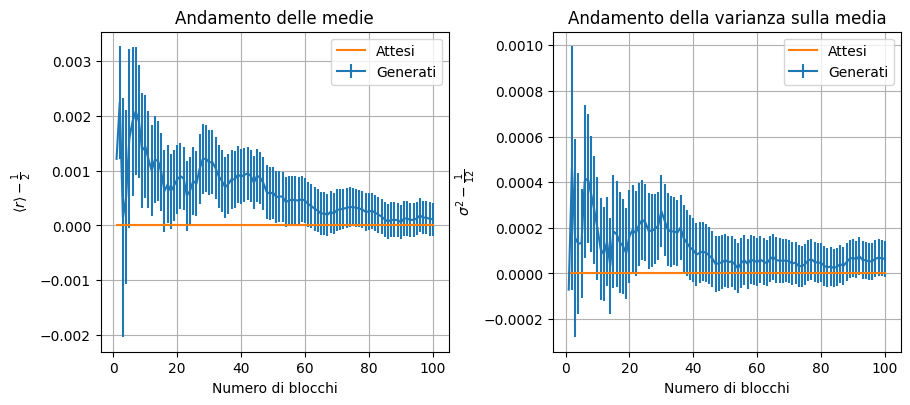

In [4]:
data=[]
#Carico i dati generati
data.append(np.loadtxt("output_ave.dat"))
data.append(np.loadtxt("output_var.dat"))

#List di titoli
titles=[r"Andamento delle medie",r"Andamento della varianza sulla media"]
labels=[r"$\langle r \rangle-\frac{1}{2}$",r"$\sigma^2-\frac{1}{12}$"]
#Faccio più plots
fig,axx=plt.subplots(1, 2, figsize=(10, 4))

for i in range(2):
    axx[i].errorbar(data[i][:,0],data[i][:,2],yerr=data[i][:,3],label="Generati")
    axx[i].plot(data[i][:,0],np.zeros(np.shape(data[i])[0]),label="Attesi")
    axx[i].set_xlabel(r"Numero di blocchi")
    axx[i].set_ylabel(labels[i])
    axx[i].set_title(titles[i])
    axx[i].grid(True)
    axx[i].legend()

plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.9, bottom=0.1, left=0.1, right=0.9)
plt.show()

Per facilitare l'analisi si è studiata la differenza tra valori attesi e valori osservati.

Si vede che queste differenze tendono a zero aumentando il numero di valori generati, mostrando una convergenza tra i valori attesi e quelli generati.

Nel caso della varianza sebra stabilirsi sopra a zero questo comportamento potrebbe essere attribuito ad un problema di approssimazione essendo il valore molto piccolo.  Si può vedere questo comportamento cessa qualora si cambiano i valori di input.

### 1.2 Distribuzione dei Numeri Generati

L'estrazione di numeri generati casualmente è caratterizzata dalla sua __distribuzione di probabilità__ $p(r)$, cioè di come si "spartisce" la probabilità tra i valori che si possono generare.

Come accennato precedentemente i numeri sono generati in maniera uniforme tra zero ed uno, cioè la probabilità di estrarre un numero in questo intervallo è spartita in maniera equa.  Qundi tra 0 e 1 la distribuzione è:
$$
p(r)=\frac{1}{r_{max}-r_{min}}=1
$$
Invece non posso estrarre valori fuori dall'intervallo.  Perciò la distribuzione è $p(r)=0$.

In [5]:
#Funzione che descrive la distribuzione uniforme attesa
def unif_dist():
    x=np.linspace(-0.5,1.5,1000)
    y=np.zeros(np.shape(x))
    for i in range(np.shape(x)[0]):
        if x[i]>=0 and x[i]<=1:
            y[i]=1
    return x,y

Di seguito si osserva la distribuzione dei numeri generati e quella attesa.

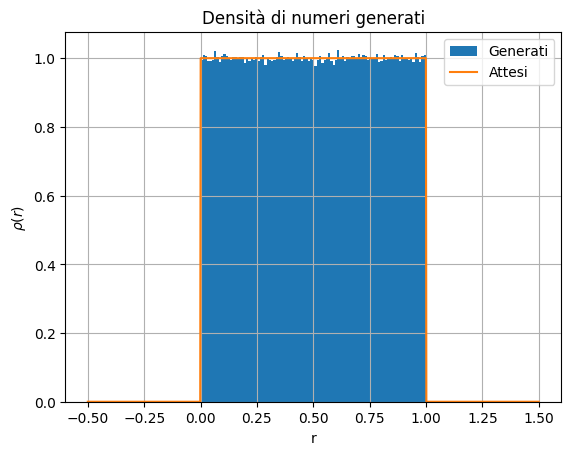

In [6]:
#Carico i dati da file
unif=np.loadtxt("output_numb.dat")
#Genero i dati attesi
x,y=unif_dist()

#Creo un istogramma dei numeri generati
plt.hist(unif,np.linspace(0,1,num=100),density=True,label="Generati")
plt.plot(x,y,label="Attesi")
#Parte estetica
plt.xlabel("r")
plt.ylabel(r"$\rho(r)$")
plt.title("Densità di numeri generati")
plt.legend()
plt.grid(True)

plt.show()

Si può osservare che i valori ottenuti rispecchiano molto bene i valori attesi.  Nonostante questo non possaimo ancora dire che la nostra distribuzione sia uniforme, o megli non lo sia, per questo dobbiamo utilizzare il *test del* $\chi^2$

#### 1.2.1 Distribuzione dei $\chi^2$

Il *test del* $\chi^2$ consiste nel dividere gli $n$ eventi in canali, quindi $M$ sottogruppi, e vedere quanto la porobabilità osservata $O_i$ si discosti da quella attesa $E_i$ in ciascuno degli $i$ canali.  Per fare ciò si usa la formula:
$$
\chi^2=\sum_{i=0}^M\frac{\left(O_i-E_i\right)^2}{E_i}
$$

Visto che la distribuzione è uniforme ci aspettiamo una $E_i=\frac{n}{M}$, quindi osserviamo quanti $n_i$ eventi rientrano in ciasun canale.  Perciò la formula diveta:
$$
\chi^2=\sum_{i=0}^M \frac{\left(n_i-\frac{n}{M}\right)^2}{\frac{n}{M}}
$$

Per ogni blocco si è iterato lo stesso ragionamento.  Si è diviso l'intervallo in $M$ canali, in questo caso $100$, e si è applicata la formula sopra.

Ci si aspetta che il valore di $\chi^2$ sia circa $E_i=\frac{n}{M}$ perciò visto che in questo caso ci sono $10'000$ numeri in ogni blocco e dividiamo l'intervallo in $100$ canali ci aspettiamo $\chi^2\approx100$. Per verificare la compatibilità dei valori ottenuti con la distribuzione teorica, compariamo i vari valori di $\chi^2$ ottenuti e la *distribuzione di* $\chi^2$.

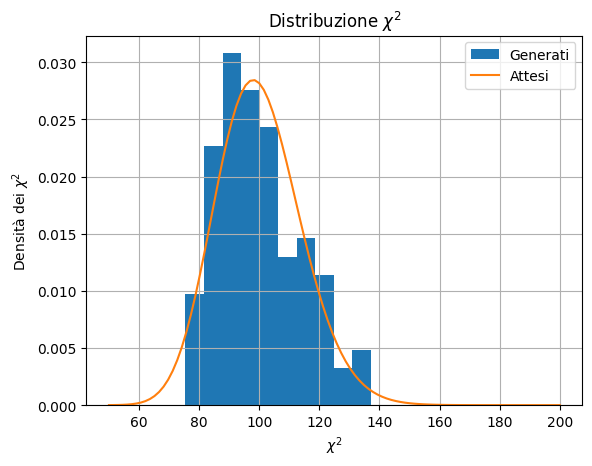

In [6]:
#Carico i dati da file
chi2_data=np.loadtxt("output_chi2.dat")
#Imposto le ascisse per la distribuzione attesa
x=np.linspace(50,200,100)

#Creo un istogramma con la distribuzione dei chi2
plt.hist(chi2_data,10,density=True,label="Generati")
plt.plot(x,chi2.pdf(x,100),label="Attesi")
#Parte estetica
plt.xlabel(r"$\chi^2$")
plt.ylabel(r"Densità dei $\chi^2$")
plt.title(r"Distribuzione $\chi^2$")
plt.legend()
plt.grid(True)


plt.show()

Si può osservare che la distribuzione dei $\chi^2$ ottenuti dai valori generati segue la distribuzione teorica di $\chi^2$, concludendo che il generatore di numeri (pseudo)casuali approssima bene l'estrazione di numeri effettivamente casuali.

## 2 Teorema del Limite Centrale

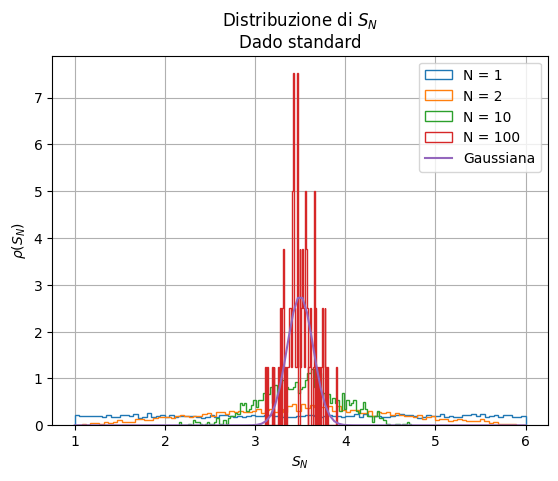

In [6]:
#Dati
N=np.array([1,2,10,100]) #Numeri per blocco
bins=100                 #Numeri di intervalli

#Ascisse per i vaolri attesi
x=np.linspace(1,6,bins)

#Valori della Gaussiana
ave=5/2+1               #Vaolre medio
rms=(6**3-1)/15
rms-=ave*ave
rms=np.sqrt(rms/N[-1])  #Deviazione standard

#Creo istogrammi del dado standard
for n in N:
    #Carico i dati generati
    r_std=np.loadtxt("standard_"+str(n)+".dat")
    h=plt.hist(r_std,bins,density=True,label="N = "+str(n),histtype='step')

plt.plot(x,norm.pdf(x,ave,rms),label="Gaussiana")
#Parte estetica
plt.xlabel(r"$S_N$")
plt.ylabel(r"$\rho(S_N)$")
plt.title(f"Distribuzione di $S_N$\nDado standard")
plt.legend()
plt.grid(True)

plt.show()

/tmp/ipykernel_2225/998636093.py:11: UserWarning: loadtxt: input contained no data: "exp_1.dat"
  r_exp=np.loadtxt("exp_"+str(n)+".dat")
/tmp/ipykernel_2225/998636093.py:11: UserWarning: loadtxt: input contained no data: "exp_2.dat"
  r_exp=np.loadtxt("exp_"+str(n)+".dat")
/tmp/ipykernel_2225/998636093.py:11: UserWarning: loadtxt: input contained no data: "exp_10.dat"
  r_exp=np.loadtxt("exp_"+str(n)+".dat")
/tmp/ipykernel_2225/998636093.py:11: UserWarning: loadtxt: input contained no data: "exp_100.dat"
  r_exp=np.loadtxt("exp_"+str(n)+".dat")


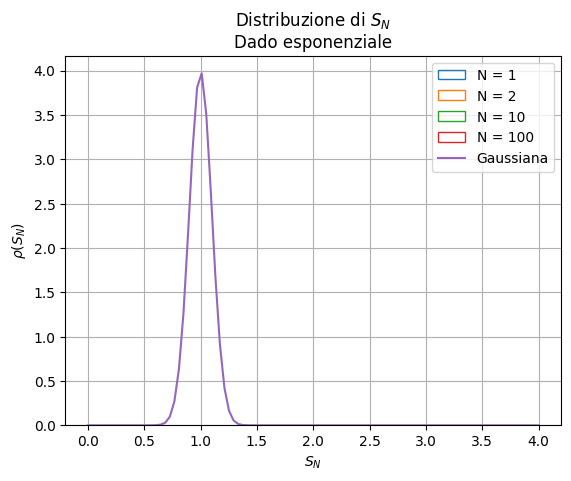

In [8]:
#Ascisse dei valori attesi
x=np.linspace(0,4,bins)

#Valori della Gaussiana
ave=1                 #Valore medio
rms=1/np.sqrt(N[-1])  #Deviazione standard

#Creo istogrammi del dado esponenziale
for n in N:
    #Carico i dati generati
    r_exp=np.loadtxt("exp_"+str(n)+".dat")
    plt.hist(r_exp,np.linspace(0,4,bins),density=True,label="N = "+str(n),histtype='step')
    
plt.plot(x,norm.pdf(x,ave,rms),label="Gaussiana")
#Parte estetica
plt.xlabel(r"$S_N$")
plt.ylabel(r"$\rho(S_N)$")
plt.title(f"Distribuzione di $S_N$\nDado esponenziale")
plt.legend()
plt.grid(True)

plt.show()

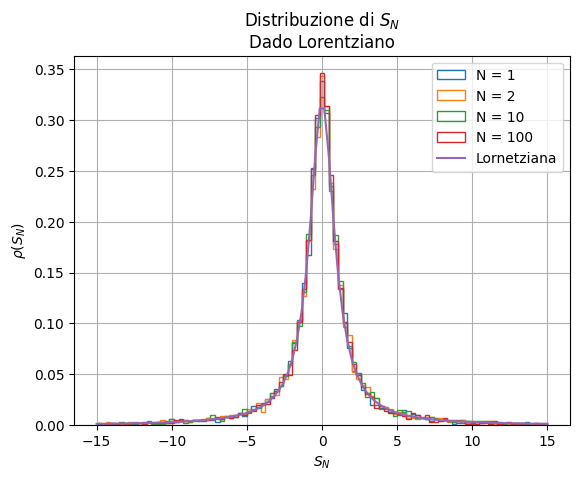

In [9]:
#Ascisse dei valori attesi
x=np.linspace(-15,15,bins)

#Valori della Lorentziana
ave=0      #Valore medio
Gamma=1    #Deviazione standard

#Creo istogrammi del dado esponenziale
for n in N:
    #Carico i dati generati
    r_ltz=np.loadtxt("ltz_"+str(n)+".dat")
    plt.hist(r_ltz,np.linspace(-15,15,bins),density=True,label="N = "+str(n),histtype='step')
    
plt.plot(x,cauchy.pdf(x,ave,Gamma),label="Lornetziana")
#Parte estetica
plt.xlabel(r"$S_N$")
plt.ylabel(r"$\rho(S_N)$")
plt.title(f"Distribuzione di $S_N$\nDado Lorentziano")
plt.legend()
plt.grid(True)

plt.show()

## Esperimento di Buffon

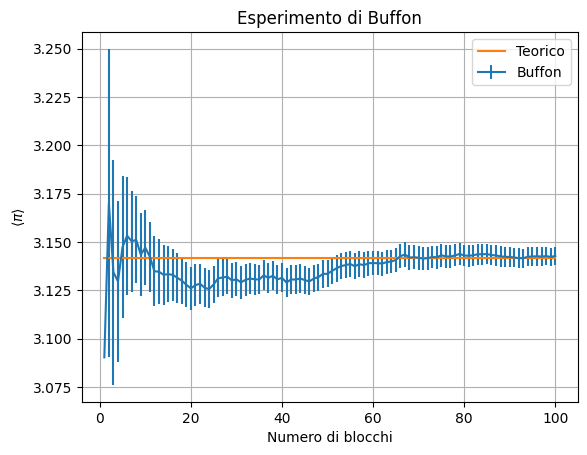

In [3]:
#Carica dati generati
buffon=np.loadtxt("buffon.dat")
#Dati attesi
y=np.ones(np.shape(buffon)[0],dtype=float)*np.pi

#Creo grafico con errore
plt.errorbar(buffon[:,0],buffon[:,1],yerr=buffon[:,2],label="Buffon")
plt.plot(buffon[:,0],y,label="Teorico")
#Parte estetica
plt.xlabel(r"Numero di blocchi")
plt.ylabel(r"$\langle\pi\rangle$")
plt.title(f"Esperimento di Buffon")
plt.legend()
plt.grid(True)

plt.show()